# Su-Schrieffer-Heeger model

<img src="ssh_chain_bulkedge.png" width="1000" >


In this notebook we explore the the Su-Schrieffer-Heeger model depicted above. We build the tight-binding model, calculate the spectrum and inspect the wavefunction of a finite system and explore the energy eigenstates and $d$-space behaviour of the model.

In [ ]:
# We import pylab and interactive widgets 
%pylab inline
from ipywidgets import *

## Bulk system in momentum space and $d$-space

First let us define the $d(k)$ vector as functions of the intracell $v$ and intercell $w$ hopping parameters.
$$\mathbf{d}(k)=\left(\begin{array}{c}
v+w\cos(k)\\
w\sin(k)\\
0\\
\end{array}\right) $$

In [2]:
def dk(k,v,w,**kwargs):
    '''
    This function returns the d vector of the SSH model.
    '''
    return [v+w*cos(k),w*sin(k),0]

Now we can write a simple interactive plot to explore the $\mathbf{d}(k)$ curve and the spectrum $E_\pm(k)=\pm\left|\mathbf{d}(k)\right|$ as we tune the hopping parameters.

In [ ]:
figsize(12,6)
kran=linspace(-pi,pi,200)
@interact(v=(-1,1,0.1),w=(-1,1,0.1))
def ekdk(v=0.5,w=0.5):
    dx,dy=dk(kran,v,w)[:2]
    #
    #-- This part makes the k-space figure--
    #
    subplot(121)
    plot(kran,sqrt(dx**2+dy**2),'k-',linewidth=3)           # This creates the
    plot(kran,-sqrt(dx**2+dy**2),'k-',linewidth=3)          # two bandlines
    #just to make it look like in the book    
    ylabel('energy E',fontsize=20);
    xlabel(r'wavenumber $k$',fontsize=20);
    xlim(-pi,pi);xticks([-pi,0,pi],['$-\pi$','0','$\pi$'],fontsize=20)
    ylim(-2.02,2.02);yticks([-2,-1,0,1,2],['-2','-1','0','1','2'],fontsize=20);
    plot(kran,0*kran,'k--')
    plot([0,0],[-2.5,2.5],'k--')

    #
    #--This part makes the d-space figure--
    #
    subplot(122)
    plot(dx,dy,'k-',linewidth=3)                                # The d(k) line itself 
    arrow(dx[30],dy[30],(dx[31]-dx[29])/30,(dy[31]-dy[29])/30,  # and an arrow
          head_width=0.15, head_length=0.2, fc='k', ec='k')     # showing winding direction
          
    #just to make it look like in the book 
    plot([0],[0],'wo',markersize=20)
    if abs(v)==abs(w):                       # Here we have a simple criterion for 
        plot([0],[0],'ro',markersize=10)     # metallicity
    plot([1,1],[-0.1,0.1],'k')
    plot([-1,-1],[-0.1,0.1],'k')
    plot([-0.1,0.1],[1,1],'k')
    plot([-0.1,0.1],[-1,-1],'k')
    arrow(-2.0,0,3.6,0,head_width=0.2, head_length=0.4, fc='k', ec='k')
    arrow(0,-1.5,0,2*1.4,head_width=0.2, head_length=0.4, fc='k', ec='k')
    xlim(-2.1,2.1)
    ylim(-2.1,2.1)
    axis('off')
    text(.9,-0.5,'1',fontsize=20);text(-1.3,-0.5,'-1',fontsize=20);
    text(-0.5,.9,'1',fontsize=20);text(-0.7,-1.1,'-1',fontsize=20);
    text(0.25,1.4,r'$d_y$',fontsize=20);text(2,-0.5,r'$d_x$',fontsize=20);

1.2 Complex-valued hopping amplitudes

In [7]:
def dk(k,v,w,z,phi,**kwargs):
    '''
    This function returns the d vector of the SSH model.
    '''
    return [v+w*cos(k)+z*cos(2*k+phi),w*sin(k)+z*sin(2*k+phi),0]

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1288/388398417.py:15: SyntaxWarning: invalid escape sequence '\p'
  xlim(-pi,pi);xticks([-pi,0,pi],['$-\pi$','0','$\pi$'],fontsize=20)
/tmp/ipykernel_1288/388398417.py:15: SyntaxWarning: invalid escape sequence '\p'
  xlim(-pi,pi);xticks([-pi,0,pi],['$-\pi$','0','$\pi$'],fontsize=20)


interactive(children=(FloatSlider(value=0.0, description='v', max=1.0, min=-1.0), FloatSlider(value=1.0, descr…

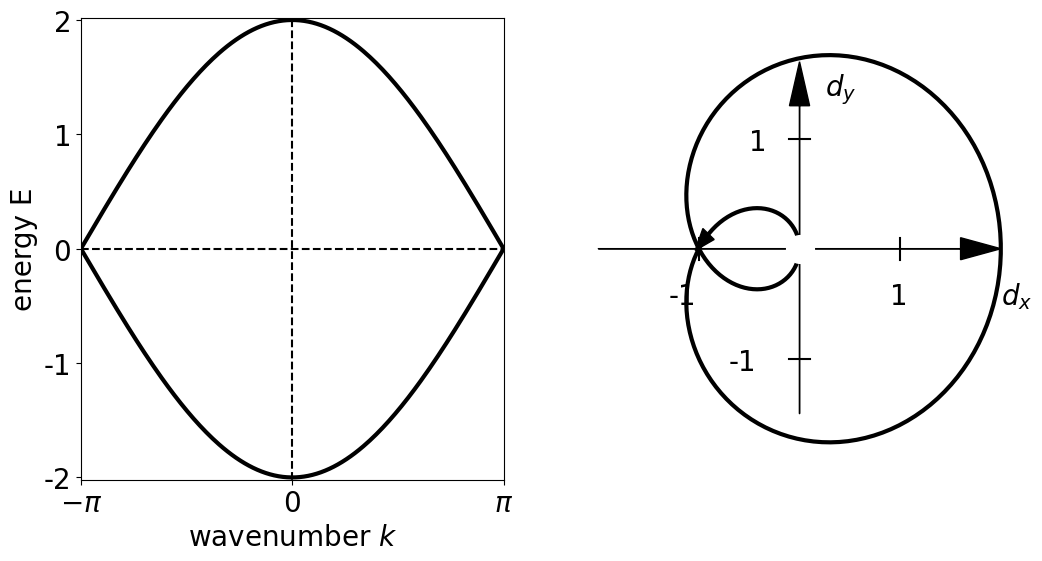

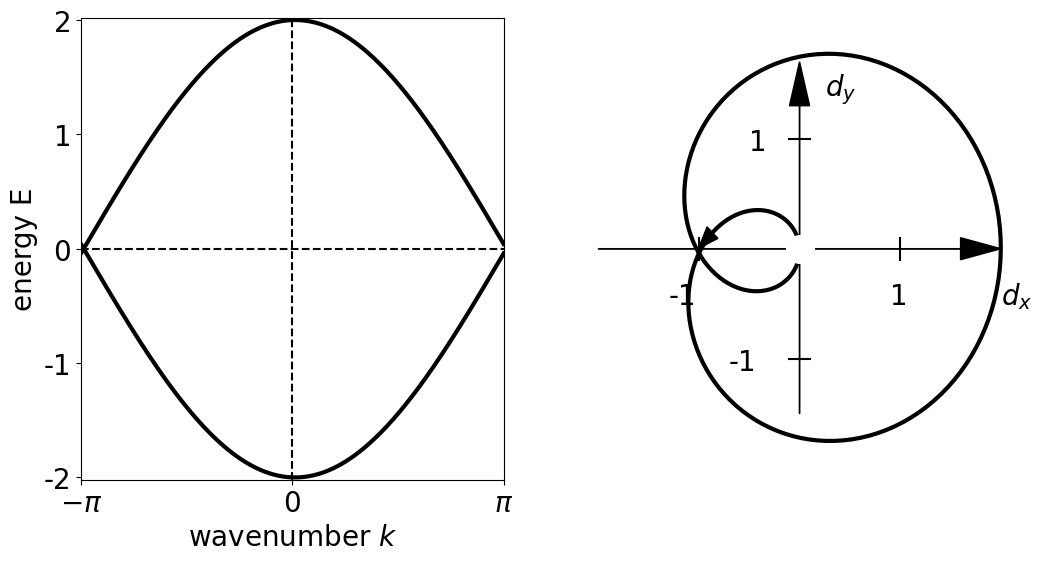

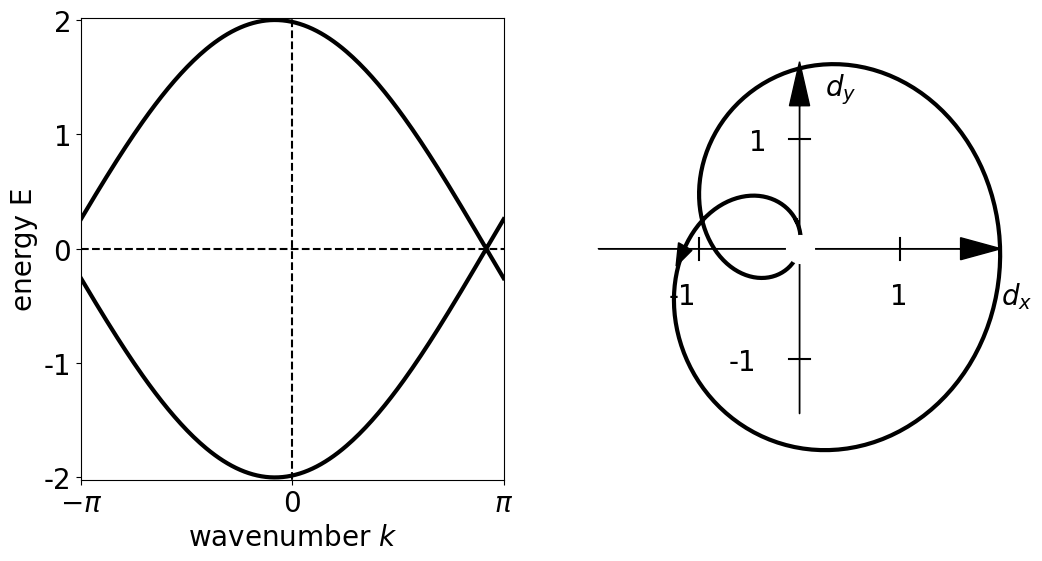

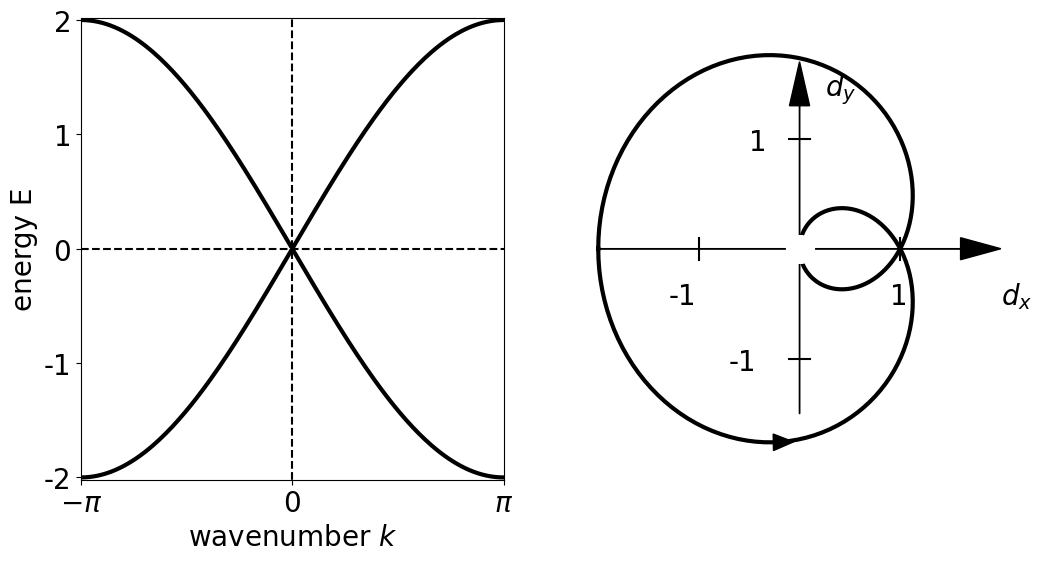

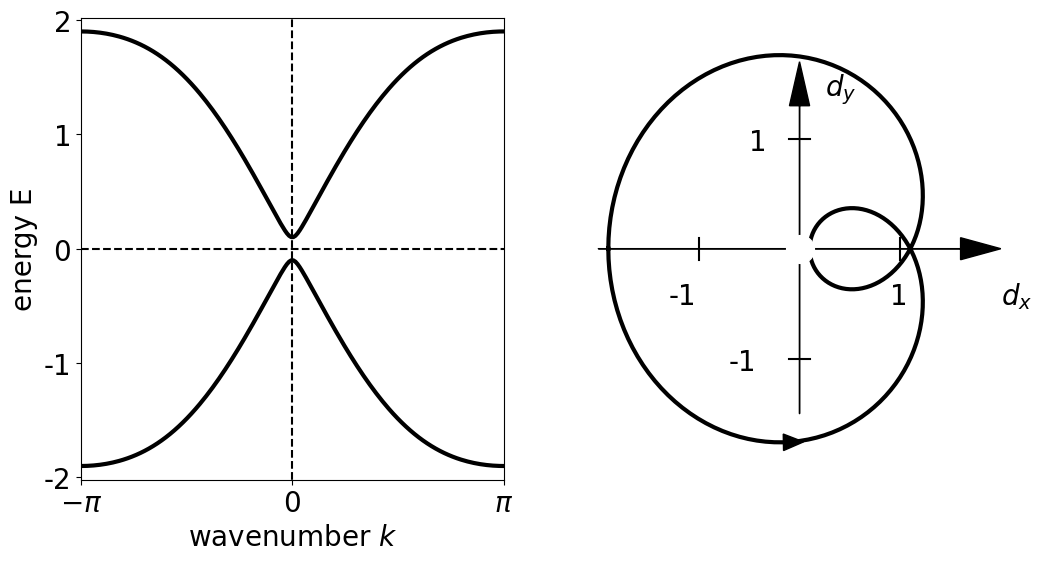

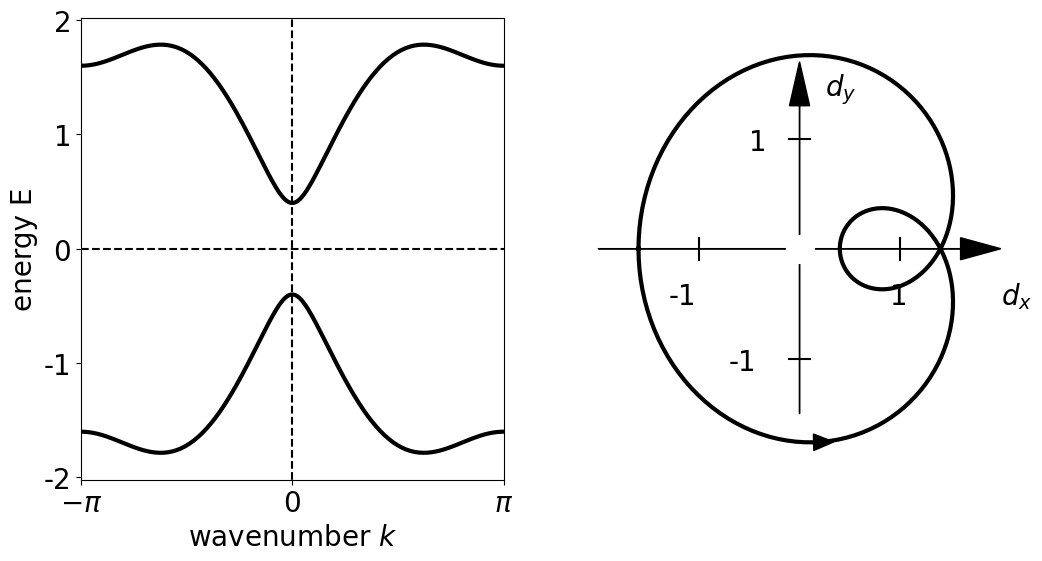

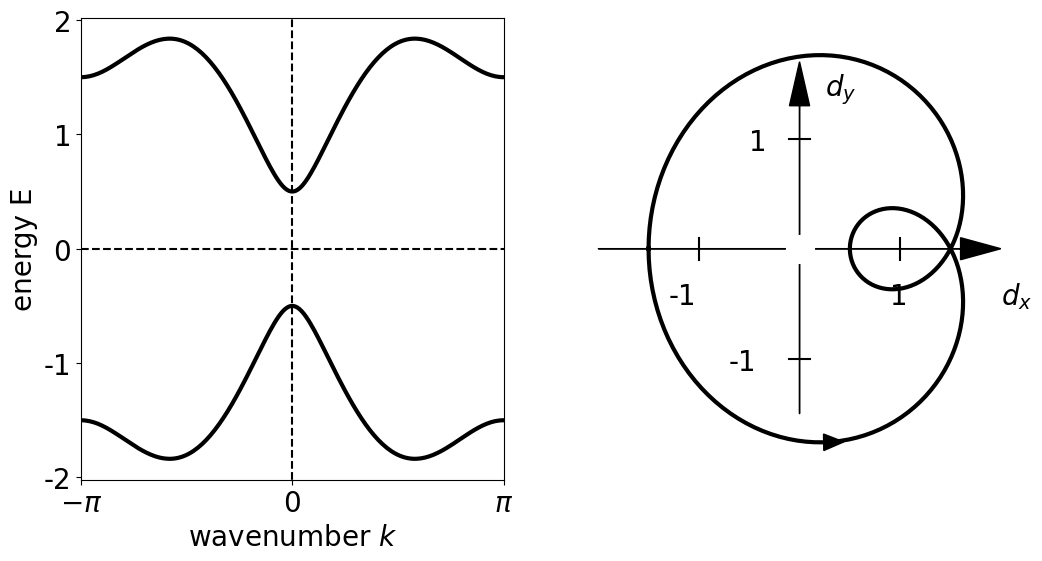

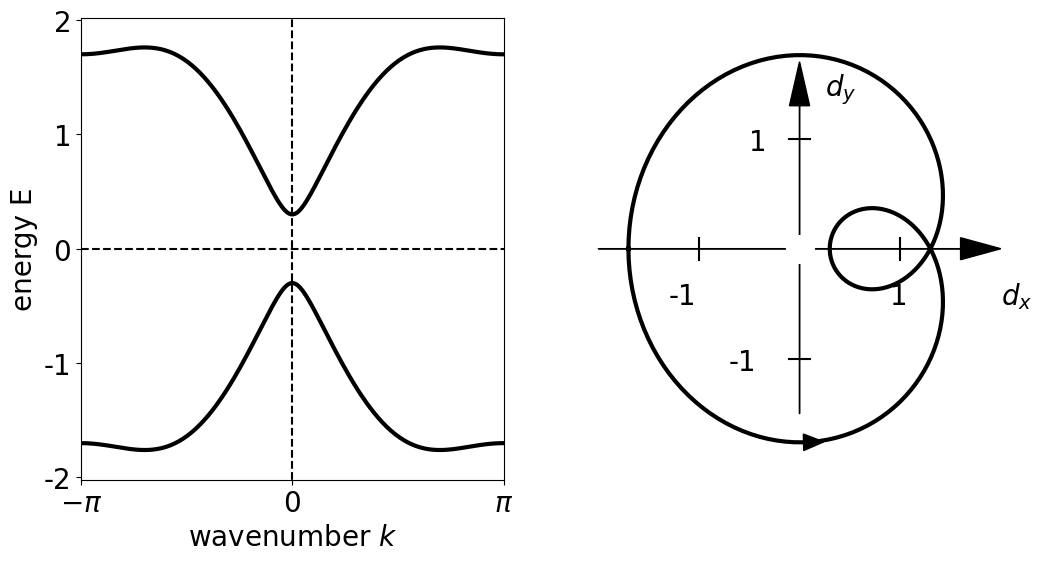

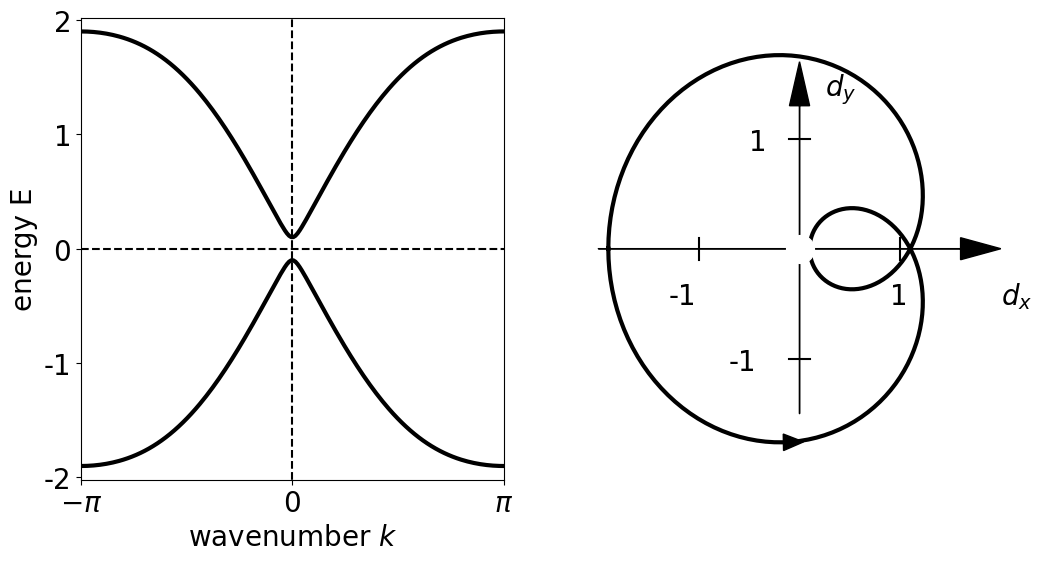

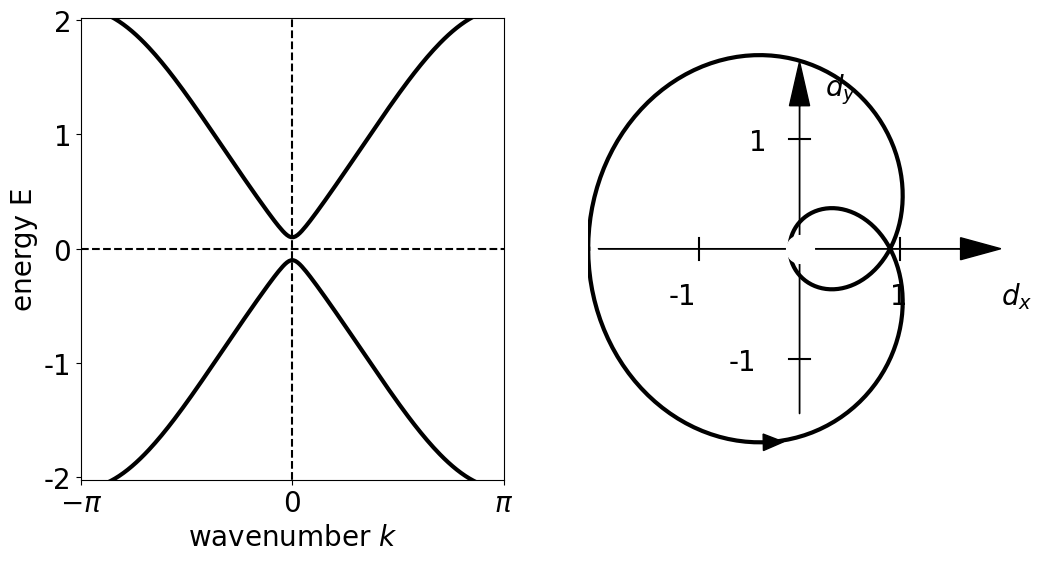

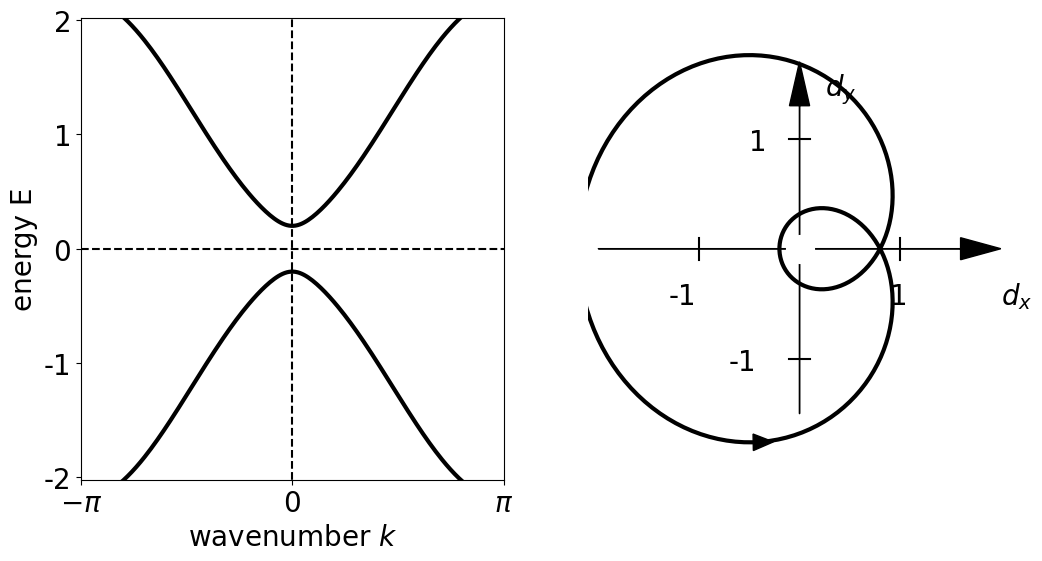

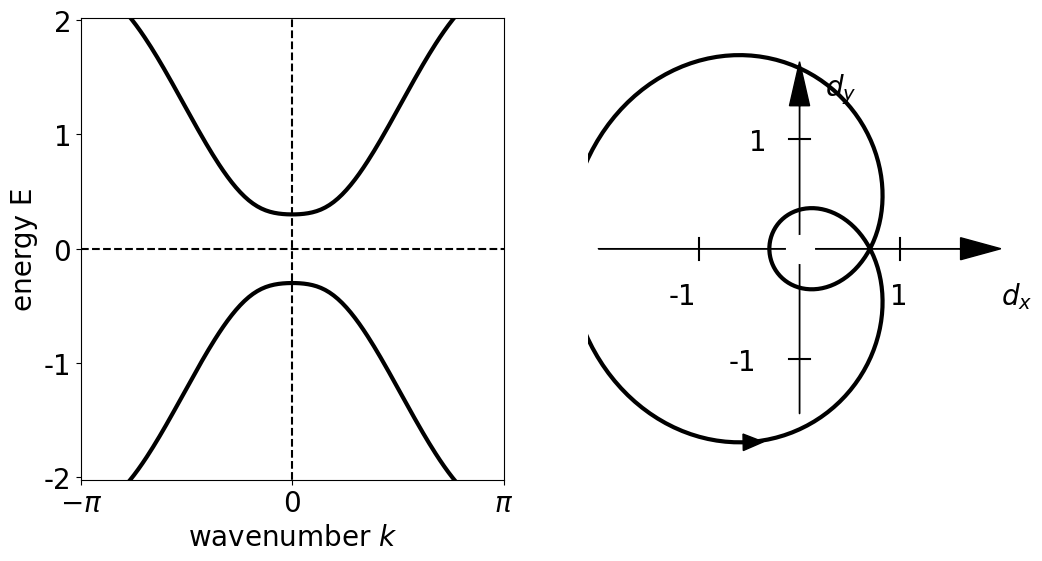

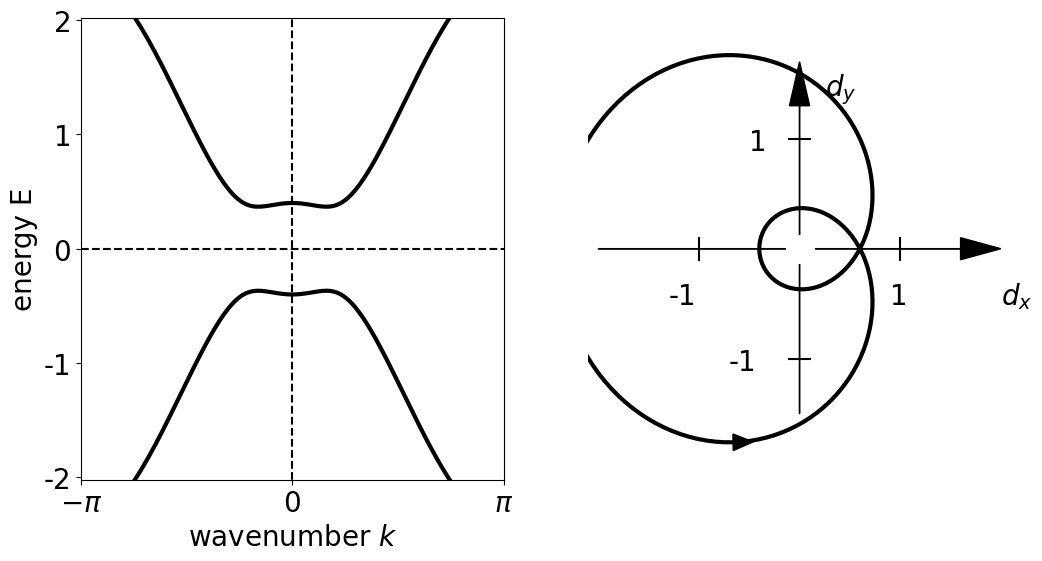

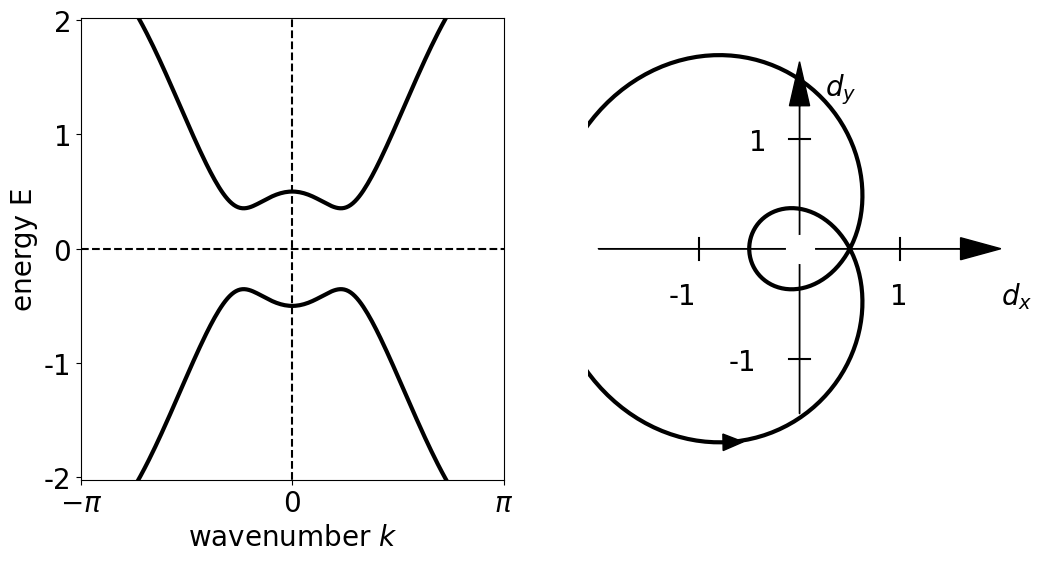

In [10]:
figsize(12,6)
kran=linspace(-pi,pi,200)
@interact(v=(-1,1,0.1),w=(-1,1,0.1),z=(-1,1,0.1),phi=(-pi,pi,0.1))
def ekdk(v=0.0,w=1.0,z=1.0,phi=0.0):
    dx,dy=dk(kran,v,w,z,phi)[:2]
    #
    #-- This part makes the k-space figure--
    #
    subplot(121)
    plot(kran,sqrt(dx**2+dy**2),'k-',linewidth=3)           # This creates the
    plot(kran,-sqrt(dx**2+dy**2),'k-',linewidth=3)          # two bandlines
    #just to make it look like in the book    
    ylabel('energy E',fontsize=20);
    xlabel(r'wavenumber $k$',fontsize=20);
    xlim(-pi,pi);xticks([-pi,0,pi],['$-\pi$','0','$\pi$'],fontsize=20)
    ylim(-2.02,2.02);yticks([-2,-1,0,1,2],['-2','-1','0','1','2'],fontsize=20);
    plot(kran,0*kran,'k--')
    plot([0,0],[-2.5,2.5],'k--')

    #
    #--This part makes the d-space figure--
    #
    subplot(122)
    plot(dx,dy,'k-',linewidth=3)                                # The d(k) line itself 
    arrow(dx[30],dy[30],(dx[31]-dx[29])/30,(dy[31]-dy[29])/30,  # and an arrow
          head_width=0.15, head_length=0.2, fc='k', ec='k')     # showing winding direction
          
    #just to make it look like in the book 
    plot([0],[0],'wo',markersize=20)
    if abs(v)==abs(w):                       # Here we have a simple criterion for 
        plot([0],[0],'ro',markersize=10)     # metallicity
    plot([1,1],[-0.1,0.1],'k')
    plot([-1,-1],[-0.1,0.1],'k')
    plot([-0.1,0.1],[1,1],'k')
    plot([-0.1,0.1],[-1,-1],'k')
    arrow(-2.0,0,3.6,0,head_width=0.2, head_length=0.4, fc='k', ec='k')
    arrow(0,-1.5,0,2*1.4,head_width=0.2, head_length=0.4, fc='k', ec='k')
    xlim(-2.1,2.1)
    ylim(-2.1,2.1)
    axis('off')
    text(.9,-0.5,'1',fontsize=20);text(-1.3,-0.5,'-1',fontsize=20);
    text(-0.5,.9,'1',fontsize=20);text(-0.7,-1.1,'-1',fontsize=20);
    text(0.25,1.4,r'$d_y$',fontsize=20);text(2,-0.5,r'$d_x$',fontsize=20);

## Finite system in real space, spectrum and wavefunctions

First let us define a simple function that generates the Hamiltonian of a finite tight-binding chain for given $v$ and $w$. For example if we have a system with three unitcells the Hamiltonian will look like

\begin{equation*}
H_{\mathrm{SSH}}=\left(\begin{array}{cccccc}
0 & v\\
v & 0 & w &  & 0\\
 & w & 0 & v\\
 &  & v & 0 & w\\
 & 0 &  & w & 0 & v\\
 &  &  &  & v & 0
\end{array}\right).
\end{equation*}

In [4]:
def H_SSH_reals(L,v,w):
    '''
    A function to bulid a finite SSH chain.
    The number of unitcells is L.
    As usual v is intracell and w ins intercell hopping.
    '''
    idL=eye(L); # identity matrix of dimension L
    odL=diag(ones(L-1),1);# upper off diagonal matrix with ones of size L
    U=matrix([[0,1],[1,0]]) # intracell
    T=matrix([[0,0],[1,0]]) # intercell
    return kron(idL,v*U)+kron(odL,w*T)+kron(odL,w*T).H

Now we will use the above function to evaluate the spectrum and wavefunctions for $w=1$ as the function of $v$.
We shall consider a small system with only $10$ unitcells. As we will see this is more than enought to visualize all the interesting effects and yet it is small enough for quick calculations. 
First we generate the eigenspectra and the wavefunctions!

In [5]:
L=10;      # Number of unitcells to take
dat=[];
vecdat=[];
vran=linspace(0,3,100) # This array contains the v values
                       # we evaluate the spectrum for.
for v in vran:
    w=1.0;
    H=H_SSH_reals(L,v,w)
    eigdat=eigh(H);      # for a given v here vi calculate the eigensystem (values and vectors)
    dat=append(dat,eigdat[0]);
    vecdat=append(vecdat,eigdat[1]);
    
dat=reshape(dat,[len(vran),2*L]);          # rewraping the data
vecdat=reshape(vecdat,[len(vran),2*L,2*L]) # to be more digestable

Now we can use the above generated data to visualize the spectrum and explore the wavefunctions.

In [ ]:
figsize(14,5)
@interact(vi=(0,len(vran)-1),n=(0,19))
def enpsi(vi=50,n=10):
    subplot(121)
    # Plotting the eigenvalues and 
    # a marker showing for which state 
    # we are exploring the wavefunction
    plot(vran,dat,'k-');    
    plot(vran[vi],dat[vi,n],'ko',markersize=13)
    
    # Make it look like the book
    text(0.125,-2.65,r'$w=1$',fontsize=30);
    xlabel(r'$v$',fontsize=25);
    xticks([0,1,2,3],fontsize=25)
    ylabel(r'energy $E$',fontsize=25);
    yticks(fontsize=25)
    ylim(-2.99,2.99)
    grid()

    subplot(122)
    # Plotting the sublattice resolved wavefunction
    bar(array(range(0,2*L,2)),  real(array(vecdat[vi][0::2,n].T)),0.9,color='grey',label='A')  # sublattice A
    bar(array(range(0,2*L,2))+1,real(array(vecdat[vi][1::2,n].T)),0.9,color='white',label='B') # sublattice B
    
    # Make it look like the book
    xticks(2*(array(range(10))),['     '+str(i) for i in array(range(11))[1:]],fontsize=25)
    ylim(-1.2,1.2)
    yticks(linspace(-1,1,5),fontsize=25,x=1.2)
    ylabel('Wavefunction',fontsize=25,labelpad=-460,rotation=-90)
    grid()
    legend(loc='lower right')
    xlabel(r'cell index $m$',fontsize=25);
    
    tight_layout()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

## 2D Bulk system in momentum space and $d$-space

Define the $d(k_x,k_y)$ vector as functions of the intracell $v_x$ and intercell $w_x$, $v_x$, $v_y$ hopping parameters.
$$\mathbf{d}(k)=\left(\begin{array}{c}
v_x+w_x\cos{k_x}+v_y\cos{(\frac{1}{2}k_x+k_y)}+w_y\cos{(\frac{1}{2}k_x-k_y)}\\
w_x\sin{k_x}+v_y\sin{(\frac{1}{2}k_x+k_y)}+w_y\sin{(\frac{1}{2}k_x-k_y)}\\
0\\
\end{array}\right) $$

In [2]:
# Define the dk2 function for the 2D SSH model
def dk2(k_x, v_x, w_x, k_y, v_y, w_y):
    """
    This function returns the d-vector of the 2D SSH model.
    k_x, k_y are in range of (-2Pi, 2Pi);
    v_x, w_x, v_y, w_y are hopping amplitudes.
    """
    d_x = v_x + w_x * np.cos(k_x) + v_y * np.cos(k_x / 2 + k_y) + w_y * np.cos(k_x / 2 - k_y)
    d_y = w_x * np.sin(k_x) + v_y * np.sin(k_x / 2 + k_y) + w_y * np.sin(k_x / 2 - k_y)
    return d_x, d_y

In [3]:
# Optimized function to plot band structure
def plot_band_structure(v_x=0.5, w_x=0.5, v_y=0.5, w_y=0.5):
    """
    Optimized and cleaner plotting function for real parts of ±sqrt(dx^2 + dy^2).
    Includes 3D band structure, 2D projections (Re(E) vs k_x, k_y),
    and the trajectory of d(k_x, k_y) in the d_x-d_y plane.
    """

    # Create a grid of k_x and k_y values with expanded range (-2π, 2π)
    k_x_vals = np.linspace(-1 * np.pi, 1 * np.pi, 200)
    k_y_vals = np.linspace(-1 * np.pi, 1 * np.pi, 200)
    KX, KY = np.meshgrid(k_x_vals, k_y_vals)

    # Vectorized calculation of d_x and d_y
    d_x, d_y = dk2(KX, v_x, w_x, KY, v_y, w_y)
    magnitude = np.sqrt(d_x**2 + d_y**2)

    # Prepare the positive and negative surfaces for real part
    real_part_positive, real_part_negative = magnitude, -magnitude

    # Plot the real parts using 3D plots, including both + and - surfaces
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle(r'Band Structure and $\mathbf{d}(k_x, k_y)$ Trajectories', fontsize=16)

    # 3D Plot for Real part (Upper Left)
    ax1 = fig.add_subplot(221, projection='3d')
    surf1 = ax1.plot_surface(KX, KY, real_part_positive, cmap='cool', edgecolor='none', alpha=0.7)
    surf2 = ax1.plot_surface(KX, KY, real_part_negative, cmap='cool', edgecolor='none', alpha=0.7)
    ax1.set_title(r'Real part of $\pm\sqrt{d_x^2 + d_y^2}$')
    ax1.set_xlabel(r'$k_x$', fontsize=12)
    ax1.set_ylabel(r'$k_y$', fontsize=12)
    ax1.set_zlabel(r'Re$(E)$', fontsize=12)

    # 2D Dot Plot for Re(E) vs k_x (Lower Right)
    ax2 = fig.add_subplot(223)
    for i in range(len(k_x_vals)):
        ax2.scatter([k_x_vals[i]]*len(k_y_vals), real_part_positive[i, :], color='tab:blue', s=0.5, alpha=0.5)
        ax2.scatter([k_x_vals[i]]*len(k_y_vals), real_part_negative[i, :], color='tab:orange', s=0.5, alpha=0.5)
    ax2.set_title(r'Re$(E)$ vs $k_x$ (Full $k_y$ range)')
    ax2.set_xlabel(r'$k_x$', fontsize=12)
    ax2.set_ylabel(r'Re$(E)$', fontsize=12)

    # 2D Dot Plot for Re(E) vs k_y (Lower Right)
    ax3 = fig.add_subplot(224)
    for i in range(len(k_y_vals)):
        ax3.scatter([k_y_vals[i]]*len(k_x_vals), real_part_positive[:, i], color='tab:blue', s=0.5, alpha=0.5)
        ax3.scatter([k_y_vals[i]]*len(k_x_vals), real_part_negative[:, i], color='tab:orange', s=0.5, alpha=0.5)
    ax3.set_title(r'Re$(E)$ vs $k_y$ (Full $k_x$ range)')
    ax3.set_xlabel(r'$k_y$', fontsize=12)
    ax3.set_ylabel(r'Re$(E)$', fontsize=12)

    # 2D plot for trajectory of d(k_x, k_y) in d_x-d_y plane (Upper Left)
    ax4 = fig.add_subplot(222)
    ax4.plot(d_x.flatten(), d_y.flatten(), color='tab:green', alpha=0.7, linewidth=0.5, label=r'$\mathbf{d}(k_x, k_y)$ trajectory')

    # Identify points where the trajectory passes through the origin and mark them
    origin_mask = (np.isclose(d_x, 0, atol=1e-3) & np.isclose(d_y, 0, atol=1e-3))
    ax4.scatter(d_x[origin_mask], d_y[origin_mask], color='tab:red', s=20, label=r'Origin ($0,0$)', zorder=3)
    
    ax4.set_title(r'Trajectory of $\mathbf{d}(k_x, k_y)$ in $d_x$-$d_y$ plane')
    ax4.set_xlabel(r'$d_x$', fontsize=12)
    ax4.set_ylabel(r'$d_y$', fontsize=12)
    ax4.legend(loc='upper right', fontsize=10)

    # Adjust layout
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

In [ ]:
# Define interactive sliders
v_x_slider = FloatSlider(value=0.5, min=-1, max=1, step=0.1, description=r'$v_x$:')
w_x_slider = FloatSlider(value=0.5, min=-1, max=1, step=0.1, description=r'$w_x$:')
v_y_slider = FloatSlider(value=0.5, min=-1, max=1, step=0.1, description=r'$v_y$:')
w_y_slider = FloatSlider(value=0.5, min=-1, max=1, step=0.1, description=r'$w_y$:')

# Use the interact function to update plots interactively
interact(plot_band_structure, v_x=v_x_slider, w_x=w_x_slider, v_y=v_y_slider, w_y=w_y_slider)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact

# Define the Hamiltonian function
def hamiltonian(kx, ky, vx, wx, vy, wy):
    """ Returns the Hamiltonian matrix for given kx, ky and hopping parameters. """
    exp_ikx = np.exp(1j * kx)
    exp_iky = np.exp(1j * ky)
    term1 = vx + wx * np.conj(exp_ikx)
    term2 = (vy * np.conj(exp_iky) + wy * exp_iky) * np.conj(np.exp(1j * kx / 2))
    
    h = np.array([[0, term1 + term2],
                  [np.conj(term1 + term2), 0]], dtype=complex)
    return h

# Function to compute the eigenvalues of the Hamiltonian
def compute_eigenvalues(kx_vals, ky_vals, vx, wx, vy, wy):
    """ Computes eigenvalues for the given kx, ky values over a grid. """
    num_kx, num_ky = len(kx_vals), len(ky_vals)
    
    real_eigenvalues = np.zeros((num_kx, num_ky, 2))  # Store real part of eigenvalues
    imag_eigenvalues = np.zeros((num_kx, num_ky, 2))  # Store imaginary part of eigenvalues
    
    for i, kx in enumerate(kx_vals):
        for j, ky in enumerate(ky_vals):
            h = hamiltonian(kx, ky, vx, wx, vy, wy)
            eigenvalues = np.linalg.eigvals(h)  # Compute eigenvalues
            real_eigenvalues[i, j, :] = np.real(eigenvalues)
            imag_eigenvalues[i, j, :] = np.imag(eigenvalues)
    
    return real_eigenvalues, imag_eigenvalues

# Interactive plot function
def interactive_plot(vx=0.5, wx=0.5, vy=0.5, wy=0.5):
    # Create a grid of kx and ky values
    kx_vals = np.linspace(-np.pi, np.pi, 100)
    ky_vals = np.linspace(-np.pi, np.pi, 100)
    
    # Compute eigenvalues
    real_eigenvalues, imag_eigenvalues = compute_eigenvalues(kx_vals, ky_vals, vx, wx, vy, wy)
    
    # Prepare the mesh grid
    KX, KY = np.meshgrid(kx_vals, ky_vals)
    
    fig = plt.figure(figsize=(12, 16))
    fig.suptitle(r'Band Structure and Eigenvalues', fontsize=16)

    # 3D Plot for Real part of eigenvalues
    ax1 = fig.add_subplot(321, projection='3d')
    ax1.plot_surface(KX, KY, real_eigenvalues[:, :, 0], cmap='viridis', edgecolor='none', alpha=0.7)
    ax1.plot_surface(KX, KY, real_eigenvalues[:, :, 1], cmap='viridis', edgecolor='none', alpha=0.7)
    ax1.set_title(r'Re(E) vs $(k_x, k_y)$')
    ax1.set_xlabel(r'$k_x$')
    ax1.set_ylabel(r'$k_y$')
    ax1.set_zlabel(r'Re$(E)$')
    
    # 3D Plot for Imaginary part of eigenvalues
    ax2 = fig.add_subplot(322, projection='3d')
    ax2.plot_surface(KX, KY, imag_eigenvalues[:, :, 0], cmap='plasma', edgecolor='none', alpha=0.7)
    ax2.plot_surface(KX, KY, imag_eigenvalues[:, :, 1], cmap='plasma', edgecolor='none', alpha=0.7)
    ax2.set_title(r'Im(E) vs $(k_x, k_y)$')
    ax2.set_xlabel(r'$k_x$')
    ax2.set_ylabel(r'$k_y$')
    ax2.set_zlabel(r'Im$(E)$')

    # 2D Projection: Re(E) vs kx (for the full ky range)
    ax3 = fig.add_subplot(323)
    for i in range(len(kx_vals)):
        ax3.scatter([kx_vals[i]] * len(ky_vals), real_eigenvalues[i, :, 0], color='b', s=0.5, alpha=0.5)
        ax3.scatter([kx_vals[i]] * len(ky_vals), real_eigenvalues[i, :, 1], color='r', s=0.5, alpha=0.5)
    ax3.set_title(r'Re$(E)$ vs $k_x$ (Full $k_y$ range)')
    ax3.set_xlabel(r'$k_x$')
    ax3.set_ylabel(r'Re$(E)$')

    # 2D Projection: Re(E) vs ky (for the full kx range)
    ax4 = fig.add_subplot(325)
    for j in range(len(ky_vals)):
        ax4.scatter([ky_vals[j]] * len(kx_vals), real_eigenvalues[:, j, 0], color='b', s=0.5, alpha=0.5)
        ax4.scatter([ky_vals[j]] * len(kx_vals), real_eigenvalues[:, j, 1], color='r', s=0.5, alpha=0.5)
    ax4.set_title(r'Re$(E)$ vs $k_y$ (Full $k_x$ range)')
    ax4.set_xlabel(r'$k_y$')
    ax4.set_ylabel(r'Re$(E)$')

    # 2D Projection: Im(E) vs kx (for the full ky range)
    ax5 = fig.add_subplot(324)
    for i in range(len(kx_vals)):
        ax5.scatter([kx_vals[i]] * len(ky_vals), imag_eigenvalues[i, :, 0], color='b', s=0.5, alpha=0.5)
        ax5.scatter([kx_vals[i]] * len(ky_vals), imag_eigenvalues[i, :, 1], color='r', s=0.5, alpha=0.5)
    ax5.set_title(r'Im$(E)$ vs $k_x$ (Full $k_y$ range)')
    ax5.set_xlabel(r'$k_x$')
    ax5.set_ylabel(r'Im$(E)$')

    # 2D Projection: Im(E) vs ky (for the full kx range)
    ax6 = fig.add_subplot(326)
    for j in range(len(ky_vals)):
        ax6.scatter([ky_vals[j]] * len(kx_vals), imag_eigenvalues[:, j, 0], color='b', s=0.5, alpha=0.5)
        ax6.scatter([ky_vals[j]] * len(kx_vals), imag_eigenvalues[:, j, 1], color='r', s=0.5, alpha=0.5)
    ax6.set_title(r'Im$(E)$ vs $k_y$ (Full $k_x$ range)')
    ax6.set_xlabel(r'$k_y$')
    ax6.set_ylabel(r'Im$(E)$')

    plt.tight_layout()
    plt.show()

# Sliders for tuning the parameters
interact(interactive_plot, 
         vx=widgets.FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='vx'), 
         wx=widgets.FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='wx'),
         vy=widgets.FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='vy'), 
         wy=widgets.FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='wy'))
